______  ___     ______                        _________
___   |/  /________  /_______ _______ ______________  /
__  /|_/ /_  __ \_  __ \  __ `/_  __ `__ \  _ \  __  / 
_  /  / / / /_/ /  / / / /_/ /_  / / / / /  __/ /_/ /  
/_/  /_/  \____//_/ /_/\__,_/ /_/ /_/ /_/\___/\__,_/   
                                                       
_____________ _________      ___________        _________            
___    |__  /_______  /_____ ___  /__  /_______ ______  /____________
__  /| |_  __ \  __  /_  __ `/_  /__  //_/  __ `/  __  /_  _ \_  ___/
_  ___ |  /_/ / /_/ / / /_/ /_  / _  ,<  / /_/ // /_/ / /  __/  /    
/_/  |_/_.___/\__,_/  \__,_/ /_/  /_/|_| \__,_/ \__,_/  \___//_/     
                                                                     



## Import

In [2]:
# import necessary modules
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import log
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

from keras.layers import Bidirectional
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading data

In [3]:
# Reading generated power (Solar and wind) data
# Dataset link : https://data.open-power-system-data.org/time_series/2020-10-06

df = pd.read_csv(
    r"C:\Users\Mohamed\OneDrive\Desktop\Graduation project\opsd-time_series-2020-10-06\time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | s.startswith('DE')),
                        parse_dates=[0], index_col=0)

In [4]:
df.head()

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,...,13841.0,13362.0,NaN,3866.0,469.0,3398.0,5307.0,4703.0,NaN,5.0
2015-01-01 01:00:00+00:00,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,...,13267.0,12858.0,NaN,3974.0,466.0,3508.0,5087.0,4562.0,NaN,7.0
2015-01-01 02:00:00+00:00,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,...,12702.0,12611.0,NaN,4194.0,470.0,3724.0,4906.0,4517.0,NaN,8.0
2015-01-01 03:00:00+00:00,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,...,12452.0,12490.0,NaN,4446.0,473.0,3973.0,4865.0,4601.0,NaN,11.0


Text(0.5, 1.0, 'Actual wind generation')

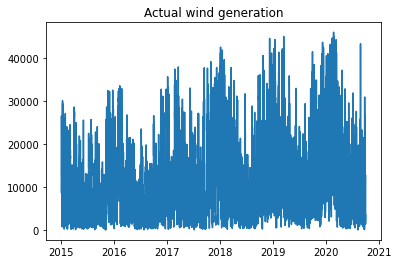

In [5]:
plt.plot(df.index, df['DE_wind_generation_actual'])
plt.title('Actual wind generation')

Text(0.5, 1.0, 'Actual solar generation')

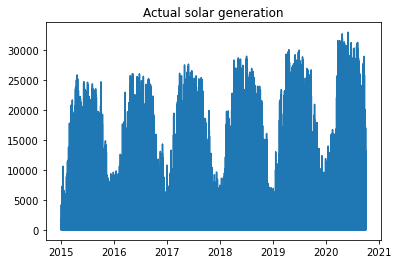

In [6]:
plt.plot(df.index, df['DE_solar_generation_actual'])
plt.title('Actual solar generation')

In [7]:
# As we see in the last two graphs , The wind and solar power aer seasonal  

production_wind_solar = df[['DE_wind_generation_actual', 'DE_solar_generation_actual']]
production_wind_solar.head()

,DE_wind_generation_actual,DE_solar_generation_actual
utc_timestamp,,
2014-12-31 23:00:00+00:00,NaN,NaN
2015-01-01 00:00:00+00:00,8852.0,NaN
2015-01-01 01:00:00+00:00,9054.0,NaN
2015-01-01 02:00:00+00:00,9070.0,NaN
2015-01-01 03:00:00+00:00,9163.0,NaN


In [8]:
# Reading weather data to be combined with power data  
# https://data.open-power-system-data.org/weather_data/2020-09-16
# Metadata link : https://data.open-power-system-data.org/weather_data/2020-09-16/README.md


weather = pd.read_csv(
    r"C:\Users\Mohamed\OneDrive\Desktop\Graduation project\opsd-weather_data-2020-09-16\weather_data.csv",
                     parse_dates=[0], index_col=0)
weather.head()

,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,CH_temperature,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,-3.640,0.0,0.0,-0.720,0.0,0.0,4.664,0.0,0.0,-6.287,...,0.0,-3.945,0.0,0.0,-3.055,0.0,0.0,-4.648,0.0,0.0
1980-01-01 01:00:00+00:00,-3.803,0.0,0.0,-1.165,0.0,0.0,4.052,0.0,0.0,-6.602,...,0.0,-4.053,0.0,0.0,-3.272,0.0,0.0,-4.554,0.0,0.0
1980-01-01 02:00:00+00:00,-3.969,0.0,0.0,-1.434,0.0,0.0,3.581,0.0,0.0,-6.981,...,0.0,-4.129,0.0,0.0,-3.639,0.0,0.0,-4.455,0.0,0.0
1980-01-01 03:00:00+00:00,-4.076,0.0,0.0,-1.843,0.0,0.0,3.197,0.0,0.0,-7.368,...,0.0,-4.139,0.0,0.0,-4.202,0.0,0.0,-4.421,0.0,0.0
1980-01-01 04:00:00+00:00,-4.248,0.0,0.0,-2.094,0.0,0.0,2.750,0.0,0.0,-7.849,...,0.0,-4.239,0.0,0.0,-4.732,0.0,0.0,-4.449,0.0,0.0


In [9]:
# resampling weather data by day to make it ready to be combined with power data  

weather_by_day = weather.groupby(weather.index).mean()
weather_by_day.head()

,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,CH_temperature,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,-3.640,0.0,0.0,-0.720,0.0,0.0,4.664,0.0,0.0,-6.287,...,0.0,-3.945,0.0,0.0,-3.055,0.0,0.0,-4.648,0.0,0.0
1980-01-01 01:00:00+00:00,-3.803,0.0,0.0,-1.165,0.0,0.0,4.052,0.0,0.0,-6.602,...,0.0,-4.053,0.0,0.0,-3.272,0.0,0.0,-4.554,0.0,0.0
1980-01-01 02:00:00+00:00,-3.969,0.0,0.0,-1.434,0.0,0.0,3.581,0.0,0.0,-6.981,...,0.0,-4.129,0.0,0.0,-3.639,0.0,0.0,-4.455,0.0,0.0
1980-01-01 03:00:00+00:00,-4.076,0.0,0.0,-1.843,0.0,0.0,3.197,0.0,0.0,-7.368,...,0.0,-4.139,0.0,0.0,-4.202,0.0,0.0,-4.421,0.0,0.0
1980-01-01 04:00:00+00:00,-4.248,0.0,0.0,-2.094,0.0,0.0,2.750,0.0,0.0,-7.849,...,0.0,-4.239,0.0,0.0,-4.732,0.0,0.0,-4.449,0.0,0.0


In [10]:
# Meging (Solar & wind) data with (weather) data

combined = pd.merge(production_wind_solar, weather_by_day, how='left', left_index=True, right_index=True)
combined.head()

,DE_wind_generation_actual,DE_solar_generation_actual,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,-6.495,0.0,0.0,0.100,0.0,0.0,-13.029,0.0,...,0.0,0.610,0.0,0.0,-11.515,0.0,0.0,-8.337,0.0,0.0
2015-01-01 00:00:00+00:00,8852.0,NaN,-6.503,0.0,0.0,-0.046,0.0,0.0,-13.350,0.0,...,0.0,0.690,0.0,0.0,-11.261,0.0,0.0,-8.272,0.0,0.0
2015-01-01 01:00:00+00:00,9054.0,NaN,-6.458,0.0,0.0,-0.302,0.0,0.0,-13.594,0.0,...,0.0,0.786,0.0,0.0,-10.975,0.0,0.0,-8.114,0.0,0.0
2015-01-01 02:00:00+00:00,9070.0,NaN,-6.253,0.0,0.0,-0.541,0.0,0.0,-13.781,0.0,...,0.0,0.946,0.0,0.0,-10.772,0.0,0.0,-7.898,0.0,0.0
2015-01-01 03:00:00+00:00,9163.0,NaN,-5.908,0.0,0.0,-0.794,0.0,0.0,-14.042,0.0,...,0.0,1.160,0.0,0.0,-10.667,0.0,0.0,-7.670,0.0,0.0


In [11]:
# Note | we have the solar and wind data from 01/01/2015 to 30/09/2020
#                   and temperature data from 01/01/1980 to 31/12/2019
#                   we should get the intersection between them to be able to create a powerful model
#                   The intersection between them is from 
#                                             01/01/2015 to 31/12/2019

combined = combined.loc[combined.index >= '2015-01-01 00:00:00+00:00', :]
combined = combined.loc[combined.index <= '2019-12-31 23:00:00+00:00', :]

combined.head()

,DE_wind_generation_actual,DE_solar_generation_actual,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,8852.0,NaN,-6.503,0.0,0.0,-0.046,0.0,0.0,-13.350,0.0,...,0.0,0.690,0.0,0.0,-11.261,0.0,0.0,-8.272,0.0,0.0
2015-01-01 01:00:00+00:00,9054.0,NaN,-6.458,0.0,0.0,-0.302,0.0,0.0,-13.594,0.0,...,0.0,0.786,0.0,0.0,-10.975,0.0,0.0,-8.114,0.0,0.0
2015-01-01 02:00:00+00:00,9070.0,NaN,-6.253,0.0,0.0,-0.541,0.0,0.0,-13.781,0.0,...,0.0,0.946,0.0,0.0,-10.772,0.0,0.0,-7.898,0.0,0.0
2015-01-01 03:00:00+00:00,9163.0,NaN,-5.908,0.0,0.0,-0.794,0.0,0.0,-14.042,0.0,...,0.0,1.160,0.0,0.0,-10.667,0.0,0.0,-7.670,0.0,0.0
2015-01-01 04:00:00+00:00,9231.0,NaN,-5.516,0.0,0.0,-1.053,0.0,0.0,-14.340,0.0,...,0.0,1.382,0.0,0.0,-10.467,0.0,0.0,-7.399,0.0,0.0


In [12]:
combined.isnull().sum()

DE_wind_generation_actual           74
DE_solar_generation_actual         103
AT_temperature                       0
AT_radiation_direct_horizontal       0
AT_radiation_diffuse_horizontal      0
                                  ... 
SI_radiation_direct_horizontal       0
SI_radiation_diffuse_horizontal      0
SK_temperature                       0
SK_radiation_direct_horizontal       0
SK_radiation_diffuse_horizontal      0
Length: 86, dtype: int64

In [13]:
# There are some nulls found should be filled by the mean of the same column

combined["DE_wind_generation_actual" ].fillna(combined["DE_wind_generation_actual" ].mean(), inplace=True)
combined["DE_solar_generation_actual"].fillna(combined["DE_solar_generation_actual"].mean(), inplace=True)

combined.isnull().sum()

DE_wind_generation_actual          0
DE_solar_generation_actual         0
AT_temperature                     0
AT_radiation_direct_horizontal     0
AT_radiation_diffuse_horizontal    0
                                  ..
SI_radiation_direct_horizontal     0
SI_radiation_diffuse_horizontal    0
SK_temperature                     0
SK_radiation_direct_horizontal     0
SK_radiation_diffuse_horizontal    0
Length: 86, dtype: int64

In [14]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2015-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 86 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DE_wind_generation_actual        43824 non-null  float64
 1   DE_solar_generation_actual       43824 non-null  float64
 2   AT_temperature                   43824 non-null  float64
 3   AT_radiation_direct_horizontal   43824 non-null  float64
 4   AT_radiation_diffuse_horizontal  43824 non-null  float64
 5   BE_temperature                   43824 non-null  float64
 6   BE_radiation_direct_horizontal   43824 non-null  float64
 7   BE_radiation_diffuse_horizontal  43824 non-null  float64
 8   BG_temperature                   43824 non-null  float64
 9   BG_radiation_direct_horizontal   43824 non-null  float64
 10  BG_radiation_diffuse_horizontal  43824 non-null  float64
 11  CH_temperature                   

In [15]:
combined.head()

,DE_wind_generation_actual,DE_solar_generation_actual,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,8852.0,4304.566318,-6.503,0.0,0.0,-0.046,0.0,0.0,-13.350,0.0,...,0.0,0.690,0.0,0.0,-11.261,0.0,0.0,-8.272,0.0,0.0
2015-01-01 01:00:00+00:00,9054.0,4304.566318,-6.458,0.0,0.0,-0.302,0.0,0.0,-13.594,0.0,...,0.0,0.786,0.0,0.0,-10.975,0.0,0.0,-8.114,0.0,0.0
2015-01-01 02:00:00+00:00,9070.0,4304.566318,-6.253,0.0,0.0,-0.541,0.0,0.0,-13.781,0.0,...,0.0,0.946,0.0,0.0,-10.772,0.0,0.0,-7.898,0.0,0.0
2015-01-01 03:00:00+00:00,9163.0,4304.566318,-5.908,0.0,0.0,-0.794,0.0,0.0,-14.042,0.0,...,0.0,1.160,0.0,0.0,-10.667,0.0,0.0,-7.670,0.0,0.0
2015-01-01 04:00:00+00:00,9231.0,4304.566318,-5.516,0.0,0.0,-1.053,0.0,0.0,-14.340,0.0,...,0.0,1.382,0.0,0.0,-10.467,0.0,0.0,-7.399,0.0,0.0


In [16]:
# print 20% of columns describtion to take some decisions

(combined.describe().T).iloc[:len(combined)//5 , :]

,count,mean,std,min,25%,50%,75%,max
DE_wind_generation_actual,43824.0,11157.555246,8686.794878,135.000,4427.75000,8745.00000,15562.250000,45085.0000
DE_solar_generation_actual,43824.0,4304.566318,6596.092670,0.000,0.00000,133.00000,6800.000000,30028.0000
AT_temperature,43824.0,8.838494,8.987517,-17.596,1.60050,8.37050,15.812250,32.6310
AT_radiation_direct_horizontal,43824.0,96.426485,179.350207,0.000,0.00000,0.53195,102.667175,869.7446
AT_radiation_diffuse_horizontal,43824.0,65.699744,89.225189,0.000,0.00000,6.95685,110.968725,403.6032
...,...,...,...,...,...,...,...,...
SI_radiation_direct_horizontal,43824.0,105.012554,194.184928,0.000,0.00000,0.40245,111.641525,895.3888
SI_radiation_diffuse_horizontal,43824.0,62.224003,85.819809,0.000,0.00000,6.22485,101.779950,408.4686
SK_temperature,43824.0,9.290873,9.742131,-18.937,1.33975,8.95250,16.948500,35.3110
SK_radiation_direct_horizontal,43824.0,97.754655,182.522103,0.000,0.00000,0.41320,101.175125,878.9789


In [17]:
# It is clear that the data should be scaled to make sure that the model will give an accurate result

X_scaler = MinMaxScaler().fit(combined.iloc[:,2:])
X_scaled = X_scaler.transform(combined.iloc[:,2:])

y_scaler = MinMaxScaler().fit(combined.iloc[:,:2])
y_scaled = y_scaler.transform(combined.iloc[:,:2])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state=42)

In [19]:
print(f"X_train -> {X_train.shape}")
print(f"y_train -> {y_train.shape}")
print(30 * "-")
print(f"X_test  -> {X_test.shape}")
print(f"y_test  -> {y_test.shape}")

X_train -> (35059, 84)
y_train -> (35059, 2)
------------------------------
X_test  -> (8765, 84)
y_test  -> (8765, 2)


In [20]:
def root_mean_squared_error(y_true, y_pred):    
    return np.sqrt(mean_squared_error(y_true, y_pred))

### MLP model

In [21]:
model = Sequential()

model.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(15, activation='relu'))
model.add(Dense(2))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(X_train, 
                    y_train, 
                    epochs= 100, 
                    verbose= 2,
                    batch_size= 5000, 
                    validation_split=0.3, 
                    callbacks = callback)

Epoch 1/100
5/5 - 1s - loss: 0.1550 - accuracy: 0.4077 - val_loss: 0.1063 - val_accuracy: 0.6489 - 771ms/epoch - 154ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0896 - accuracy: 0.6986 - val_loss: 0.0669 - val_accuracy: 0.7566 - 53ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0596 - accuracy: 0.8060 - val_loss: 0.0470 - val_accuracy: 0.8505 - 54ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0425 - accuracy: 0.8654 - val_loss: 0.0343 - val_accuracy: 0.8799 - 57ms/epoch - 11ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0316 - accuracy: 0.8857 - val_loss: 0.0275 - val_accuracy: 0.8883 - 56ms/epoch - 11ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0268 - accuracy: 0.8902 - val_loss: 0.0255 - val_accuracy: 0.8929 - 54ms/epoch - 11ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0255 - accuracy: 0.8957 - val_loss: 0.0252 - val_accuracy: 0.8963 - 57ms/epoch - 11ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0253 - accuracy: 0.8979 - val_loss: 0.0246 - val_accuracy: 0.8952 - 56ms/epoch - 11ms/step
Epoch 9/100
5/5 - 0s -

In [22]:
y_pred = model.predict(X_test)

print(f"y_test  -> {y_test.shape}")
print(f"y_pred  -> {y_pred.shape}")

274/274 [==============================] - 1s 2ms/step
y_test  -> (8765, 2)
y_pred  -> (8765, 2)


In [23]:
print("The real values\n",30*"-")
pd.DataFrame(y_scaler.inverse_transform(y_test)).iloc[111:122,:]

The real values
 ------------------------------


,0,1
111,37885.0,609.0
112,16804.0,0.0
113,6269.0,4316.0
114,2637.0,0.0
115,14275.0,0.0
116,18643.0,14938.0
117,9615.0,15578.0
118,3070.0,19740.0
119,19020.0,0.0
120,26802.0,0.0


In [24]:
print("The predicted values\n",30*"-")
pd.DataFrame(y_scaler.inverse_transform(y_pred)).iloc[111:122,:]

The predicted values
 ------------------------------


,0,1
111,24936.638672,-273.658203
112,14795.340820,-209.097534
113,8903.007812,4537.818359
114,14540.893555,491.734039
115,11625.927734,113.320869
116,15021.844727,16559.103516
117,12944.577148,16209.002930
118,2422.334229,17875.314453
119,9690.816406,-194.248611
120,16959.261719,-25.610981


In [25]:
train_results = model.evaluate(X_train, y_train)
test_results  = model.evaluate(X_test, y_test)



y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

274/274 [==============================] - 0s 1ms/step


In [26]:
print("*" * 56)
print(" Train ".center(56,"-"))
print("*" * 56)

print("Mean absolute error ----------->", mean_absolute_error(y_train.flatten(),y_pred_train.flatten()))
print("Mean squared error ------------>", mean_squared_error(y_train.flatten(),y_pred_train.flatten()))
print("Root mean squared error ------->", sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten())))
print("Root mean squared log error --->", log(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten()))),sep="")
print("R squared  -------------------->", r2_score(y_train.flatten(),y_pred_train.flatten()))

print("\n","*" * 56,sep="")
print(" Test ".center(56,"-"))
print("*" * 56)

print("Mean absolute error ----------->", mean_absolute_error(y_test.flatten(), y_pred_test.flatten()))
print("Mean squared error ------------>", mean_squared_error(y_test.flatten(), y_pred_test.flatten()))
print("Root mean squared error ------->", sqrt(mean_squared_error(y_test.flatten(), y_pred_test.flatten())))
print("Root mean squared log error --->", log(sqrt(mean_squared_error(y_test.flatten(), y_pred_test.flatten()))),sep="")
print("R squared  -------------------->", r2_score(y_test.flatten(), y_pred_test.flatten()))


********************************************************
------------------------ Train -------------------------
********************************************************
Mean absolute error -----------> 0.07667013567181445
Mean squared error ------------> 0.013849597963805646
Root mean squared error -------> 0.11768431485888697
Root mean squared log error --->-2.139749537327088
R squared  --------------------> 0.6959733693214841

********************************************************
------------------------- Test -------------------------
********************************************************
Mean absolute error -----------> 0.07639350021451119
Mean squared error ------------> 0.013629400238748549
Root mean squared error -------> 0.11674502232964173
Root mean squared log error --->-2.1477630186341883
R squared  --------------------> 0.6953841801074052


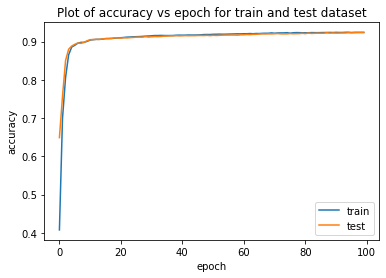

In [27]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

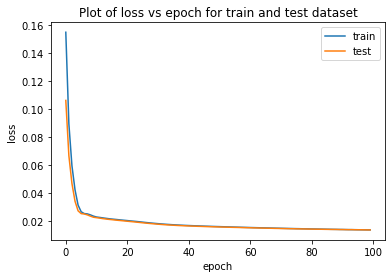

In [28]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### CNN model

In [29]:
model = Sequential()

model.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(4)))  
model.add(Dropout(0.2))
model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(4)))  
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=50))

model.add(Dense(units=2))

In [30]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train, 
                    y_train, 
                    epochs= 100, 
                    verbose= 2,
                    batch_size= 5000,
                    validation_split=0.3, 
                    callbacks= callback)

Epoch 1/100
5/5 - 2s - loss: 0.0679 - accuracy: 0.5043 - val_loss: 0.0374 - val_accuracy: 0.7233 - 2s/epoch - 344ms/step
Epoch 2/100
5/5 - 1s - loss: 0.0482 - accuracy: 0.7678 - val_loss: 0.0330 - val_accuracy: 0.8748 - 912ms/epoch - 182ms/step
Epoch 3/100
5/5 - 1s - loss: 0.0337 - accuracy: 0.8490 - val_loss: 0.0348 - val_accuracy: 0.8843 - 888ms/epoch - 178ms/step
Epoch 4/100
5/5 - 1s - loss: 0.0322 - accuracy: 0.8668 - val_loss: 0.0303 - val_accuracy: 0.8970 - 922ms/epoch - 184ms/step
Epoch 5/100
5/5 - 1s - loss: 0.0290 - accuracy: 0.8884 - val_loss: 0.0270 - val_accuracy: 0.8999 - 878ms/epoch - 176ms/step
Epoch 6/100
5/5 - 1s - loss: 0.0279 - accuracy: 0.8948 - val_loss: 0.0287 - val_accuracy: 0.8982 - 919ms/epoch - 184ms/step
Epoch 7/100
5/5 - 1s - loss: 0.0267 - accuracy: 0.8921 - val_loss: 0.0320 - val_accuracy: 0.8941 - 826ms/epoch - 165ms/step
Epoch 8/100
5/5 - 1s - loss: 0.0262 - accuracy: 0.8966 - val_loss: 0.0308 - val_accuracy: 0.8945 - 775ms/epoch - 155ms/step
Epoch 9/100

In [32]:
train_results = model.evaluate(X_train, y_train)
test_results  = model.evaluate(X_test, y_test)



y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

274/274 [==============================] - 1s 2ms/step


In [33]:
print("*" * 56)
print(" Train ".center(56,"-"))
print("*" * 56)

print("Mean absolute error ----------->", mean_absolute_error(y_train.flatten(),y_pred_train.flatten()))
print("Mean squared error ------------>", mean_squared_error(y_train.flatten(),y_pred_train.flatten()))
print("Root mean squared error ------->", sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten())))
print("Root mean squared log error --->", log(sqrt(mean_squared_error(y_train.flatten(),y_pred_train.flatten()))),sep="")
print("R squared  -------------------->", r2_score(y_train.flatten(),y_pred_train.flatten()))

print("\n","*" * 56,sep="")
print(" Test ".center(56,"-"))
print("*" * 56)

print("Mean absolute error ----------->", mean_absolute_error(y_test.flatten(), y_pred_test.flatten()))
print("Mean squared error ------------>", mean_squared_error(y_test.flatten(), y_pred_test.flatten()))
print("Root mean squared error ------->", sqrt(mean_squared_error(y_test.flatten(), y_pred_test.flatten())))
print("Root mean squared log error --->", log(sqrt(mean_squared_error(y_test.flatten(), y_pred_test.flatten()))),sep="")
print("R squared  -------------------->", r2_score(y_test.flatten(), y_pred_test.flatten()))


********************************************************
------------------------ Train -------------------------
********************************************************
Mean absolute error -----------> 0.09282518203520954
Mean squared error ------------> 0.018135201269885652
Root mean squared error -------> 0.1346670014141759
Root mean squared log error --->-2.004950203943355
R squared  --------------------> 0.6018957262752893

********************************************************
------------------------- Test -------------------------
********************************************************
Mean absolute error -----------> 0.09232878996838713
Mean squared error ------------> 0.01796764685128044
Root mean squared error -------> 0.13404345135544832
Root mean squared log error --->-2.0095912677467553
R squared  --------------------> 0.5984247742917599


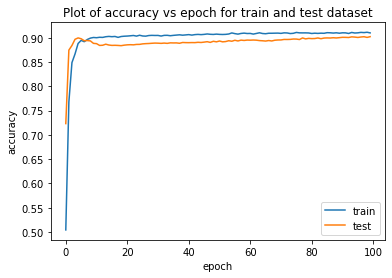

In [34]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

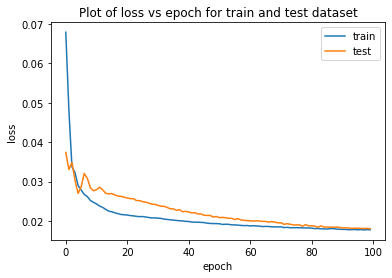

In [35]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()